In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
spdata = pd.read_pickle('SP.pkl')
mpdata = pd.read_pickle('MP.pkl')

In [14]:
spdata.columns

Index(['Patient ID', 'Race recode (W, B, AI, API)',
       'Race recode (White, Black, Other)', 'Year of diagnosis',
       'Site recode ICD-O-3/WHO 2008', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade', 'Laterality',
       'ICD-O-3 Hist/behav, malignant',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016+)', 'Derived SEER Combined T (2016+)',
       'Derived SEER Combined N (2016+)', 'Derived SEER Combined M (2016+)',
       'RX Summ--Surg Prim Site (1998+)', 'Radiation sequence with surgery',
       'Radiation recode', 'Chemotherapy recode (yes, no/unk)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Combined Mets at DX-liver (2010+)',
       'SEER Combined Mets at DX-lung (2010+)', 'Breast Subtype (2010+)',
       'ER Stat

In [13]:
mpdata.columns

Index(['Patient ID', 'Record number recode',
       'Site recode B ICD-O-3/WHO 2008 (Event Variable)', 'Year of diagnosis',
       'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008',
       'Age recode with <1 year olds', 'Age at diagnosis',
       'Primary Site - labeled', 'Histologic Type ICD-O-3', 'Grade',
       'Laterality', 'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016+)', 'Derived SEER Combined T (2016+)',
       'Derived SEER Combined N (2016+)', 'Derived SEER Combined M (2016+)',
       'RX Summ--Surg Prim Site (1998+)', 'Radiation sequence with surgery',
       'Radiation recode', 'Chemotherapy recode (yes, no/unk)',
       'Tumor Size Summary (2016+)', 'CS tumor size (2004-2015)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Co

1. Time Feature in mpdata

In [85]:
sp_age = spdata.groupby('Age at diagnosis').size()/spdata.shape[0]
mp_age = mpdata[mpdata['Record number recode']==1].groupby('Age at diagnosis').size()/mpdata[mpdata['Record number recode']==1].shape[0]
op_age = mpdata[mpdata['Record number recode']==2].groupby('Age at diagnosis').size()/mpdata[mpdata['Record number recode']==2].shape[0]

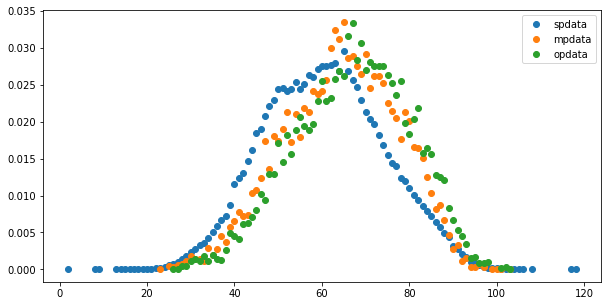

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(sp_age.index, sp_age.values, label='spdata');
plt.scatter(mp_age.index, mp_age.values, label='mpdata');
plt.scatter(op_age.index, op_age.values, label='opdata');
plt.legend();
plt.show()